### Employee attrition prediction using kaggla data augmented with gpt2 huggingface model

### Section 1

This notebook provides an in-depth exploration of ML models that can effectively address employee attrition challenges across organizations. We have specifically chosen to address this business problem because the quality of employees plays a crucial role in determining an organization's performance as they serve as its foundation. Hence, organizations must overcome various challenges posed by employee attrition, including:

1. Costly investment in training new employees, both in terms of financial resources and time.

2. Depletion of experienced workforce.

3. Adverse effects on productivity.

4. Negative impact on profitability.

The ML models presented below aim to tackle these challenges by focusing on reducing attrition within the organization. These models serve as a valuable complement to an organization's strategy by identifying employees who are more likely to leave. This approach helps the organization avoid the risk of mistakenly categorizing an employee as 'not leaving' when, in fact, they do choose to leave. 

The models also help us answer the following business questions - 

1. What are the key drivers/features of employee attrition?

2. What is the business impact and value proposition of the proposed model or solution?

3. Can the model yield substantial cost savings for the organization?

4. Which specific business unit is experiencing a notable attrition challenge?

In order to analyse the business problem, we have chosen a suitable dataset which can be found on https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors

Before we move ahead further, the following tables shows how the analysis done below can be mapped to the materials taught in the module lectures - 
				
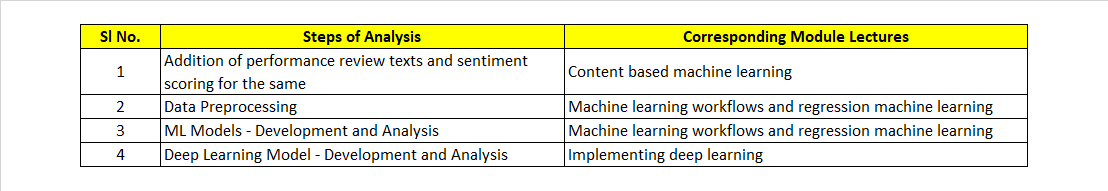

### 1. Load relevant libraries and make preliminary modifications to the dataset

In [2]:
#!pip install transformers
# if the module is not loaded, kindly install it before running the first section of the code

Import all the libraries required for preliminary modifications, data pre-processing and model development

In [1]:
from transformers import pipeline #HuggingFace Transformers python library
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import export_graphviz
import matplotlib as mp
import matplotlib.pyplot as plt
import graphviz as gp
from sklearn import decomposition as dcp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,mean_squared_error, confusion_matrix

pd.set_option('display.max_columns', 500)

/home/jit/anaconda3/envs/businessanalytics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-05 10:51:02.409523: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 10:51:02.622127: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 10:51:02.623244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 10:51:03.630172: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


If one wants to run the code with google collab, keep google=True for the following section

In [4]:
google = False

if google:
    from google.colab import drive
    drive.mount('/content/gdrive')
    path = "gdrive/MyDrive/"
else:
    path = ""

In [5]:
file_path = path + "HR_Analytics.csv"

# Load the dataset into a pandas DataFrame

df = pd.read_csv(file_path)#HR_Analytics.csv


Since the dataset doesn't contain any textual data, we are adding generated performance reviews using the GPT 2 LLM available on hugging face transformers

## *NOTE - Avoid running the text generation code without gpu*

In [ ]:
# Define the model and task
model_name = "gpt2"
task = "text-generation"

# Initialize the pipeline
generator = pipeline(task, model=model_name)

# Define a function to generate performance reviews
def generate_performance_review(row):
    prompt = f"Employee {row['EmployeeNumber']} is a {row['Age']}-year-old {row['Gender']} working in the {row['Department']} department. They have {row['EnvironmentSatisfaction']} satisfaction with their work environment and {row['JobSatisfaction']} job satisfaction. They have {row['TotalWorkingYears']} years of total working experience, {row['YearsAtCompany']} years of experience with the current company, and {row['YearsInCurrentRole']} years of experience in their current role. Their job level is {row['JobLevel']} and their monthly income is ${row['MonthlyIncome']} with a performance rating of {row['PerformanceRating']}."
    review = generator(prompt, max_length=100)[0]['generated_text'].strip()
    return review

# Apply the generate_performance_review function to create a new column 'PerformanceReview'
df['PerformanceReview'] = df.apply(generate_performance_review, axis=1)

# Print the updated DataFrame
print(df.head)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_tok

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# Save the DataFrame to a CSV file (to save time for further pre processing due to extensive time taken by HF transformer)
df.to_csv("employee_attrition.csv", index=False)

Once we have generated the performance reviews, we will then be using them to generate sentiment scores using the GPT 2 LLM available on HuggingFace.

In [6]:
# Load the dataframe
df2 = pd.read_csv("employee_attrition.csv")
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceReview
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Employee 1 is a 41-year-old Female working in ...
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Employee 2 is a 49-year-old Male working in th...
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Employee 4 is a 37-year-old Male working in th...
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Employee 5 is a 33-year-old Female working in ...
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Employee 7 is a 27-year-old Male working in th...


In [4]:
#Using the sentiment analyzer function to generate sentiment scores of performance reviews

# Define the column to perform sentiment analysis on
column_name = "PerformanceReview"

# Initialize the sentiment analysis pipeline
sentiment_classifier = pipeline("sentiment-analysis")

# Perform sentiment analysis and store the sentiment scores in a new column
df2['SentimentScore'] = df2[column_name].apply(lambda text: sentiment_classifier(text)[0]['score'])

# Print the updated dataframe
df2.head()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceReview,SentimentScore
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Employee 1 is a 41-year-old Female working in ...,0.925793
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Employee 2 is a 49-year-old Male working in th...,0.689673
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Employee 4 is a 37-year-old Male working in th...,0.986674
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Employee 5 is a 33-year-old Female working in ...,0.992252
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Employee 7 is a 27-year-old Male working in th...,0.642458


In [ ]:
# Save the DataFrame to a CSV file (to save time for further pre processing due to extensive time taken by HF transformer)
google = False

if google:

    file_path = '/content/gdrive/MyDrive/employee_attrition_latest.csv'
else:
    file_path = "employee_attrition_latest.csv"

df2.to_csv(file_path, index=False)

### Section 2


Now since we have the dataset with the performance measures and corresponding sentiment scores, we will perform a few data readiness measures prior to preprocessing the dataset

In [6]:
#Importing the updated csv dataset
df3 = pd.read_csv("employee_attrition_latest.csv")

#Removing the performance review column since we will only the sentiment score column
df4 = df3.drop('PerformanceReview', axis=1)

#Categorising the sentiment score into three categories i.e. negative, moderate and positive using the values as given in the
#function below

def categorize_sentiment(score):
    if score >= 0 and score <= 0.4: #between 0 to 0.4
        return 'Negative'
    elif score > 0.4 and score <= 0.7: #between 0.4 to 0.7
        return 'Moderate'
    elif score > 0.7 and score <= 1: #between 0.7 to 1
        return 'Positive'
    else:
        return 'Undefined'  # Add a default category for values outside the specified ranges

# Apply the categorize_sentiment function to the 'SentimentScore' column
df4['PerformanceCategory'] = df4['SentimentScore'].apply(categorize_sentiment)

#Removing the sentiment score column
df5 = df4.drop('SentimentScore', axis=1)

#Print the updated dataframe
df5

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceCategory
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Positive
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Moderate
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Positive
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Positive
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,Moderate
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,Positive
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,Moderate
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,Positive


### 2. Data Preprocessing and Exploration

Now since our dataset is ready with the appropriate columns needed for analysis, we will now move to preprocessing the data

In [7]:
#a function to analyze the problems and features of data

def check_data_quality(data):
    # Check for duplicate rows
    duplicate_rows = data[data.duplicated()]
    
    # Check for missing values
    missing_values = data.isnull().sum()
    
    # Get data types and missing value status for each column header
    column_info = []
    for column in data.columns:
        column_type = data[column].dtype
        has_missing_values = missing_values[column] > 0
        missing_value_count = missing_values[column]
        unique_val_count=len(data[column].unique())
        column_info.append((column, column_type, has_missing_values,missing_value_count,unique_val_count))
    
    # Return the results
    if len(duplicate_rows) > 0:
        print( "Duplicate Rows Found:\n", duplicate_rows)
    else:
        print( "No Duplicate Rows Found.")
    print("shape of the data is:",data.shape)
    
    return  pd.DataFrame(column_info, columns=["Column", "Data_Type", "Missing_Values","Missing_Count","unique_val_count"])


In [8]:
df5_data=check_data_quality(df5)
df5_data
#applied the function

No Duplicate Rows Found.
shape of the data is: (1470, 36)


,Column,Data_Type,Missing_Values,Missing_Count,unique_val_count
0,Age,int64,False,0,43
1,Attrition,object,False,0,2
2,BusinessTravel,object,False,0,3
3,DailyRate,int64,False,0,886
4,Department,object,False,0,3
5,DistanceFromHome,int64,False,0,29
6,Education,int64,False,0,5
7,EducationField,object,False,0,6
8,EmployeeCount,int64,False,0,1
9,EmployeeNumber,int64,False,0,1470


In [9]:
# we can see there is no missing data and duplicate rows and checking through the unique value counts, we can see some of them having values as 1

#So we identify any redundant columns i.e. columns which have only 1 value throughout the dataset and add no meaning or variation

print(df5_data[df5_data["unique_val_count"]==1])
df5_data[df5_data["unique_val_count"]==1].columns


           Column Data_Type  Missing_Values  Missing_Count  unique_val_count
8   EmployeeCount     int64           False              0                 1
21         Over18    object           False              0                 1
26  StandardHours     int64           False              0                 1


Index(['Column', 'Data_Type', 'Missing_Values', 'Missing_Count',
       'unique_val_count'],
      dtype='object')

We observe that 'EmployeeCount', 'Over18', 'StandardHours' have only a single value. Hence, we will remove them. Also, upon closer inspection of the data we can also see that the 'EmployeeNumber' is simply like a index and does not add any new information. Hence, we will remove that column as well.

In [10]:
#Removing the columns
df5.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace = True)
df5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceCategory
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Positive
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,Moderate
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Positive
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,Positive
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,Moderate


/tmp/ipykernel_34469/1093038553.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df5.corr()


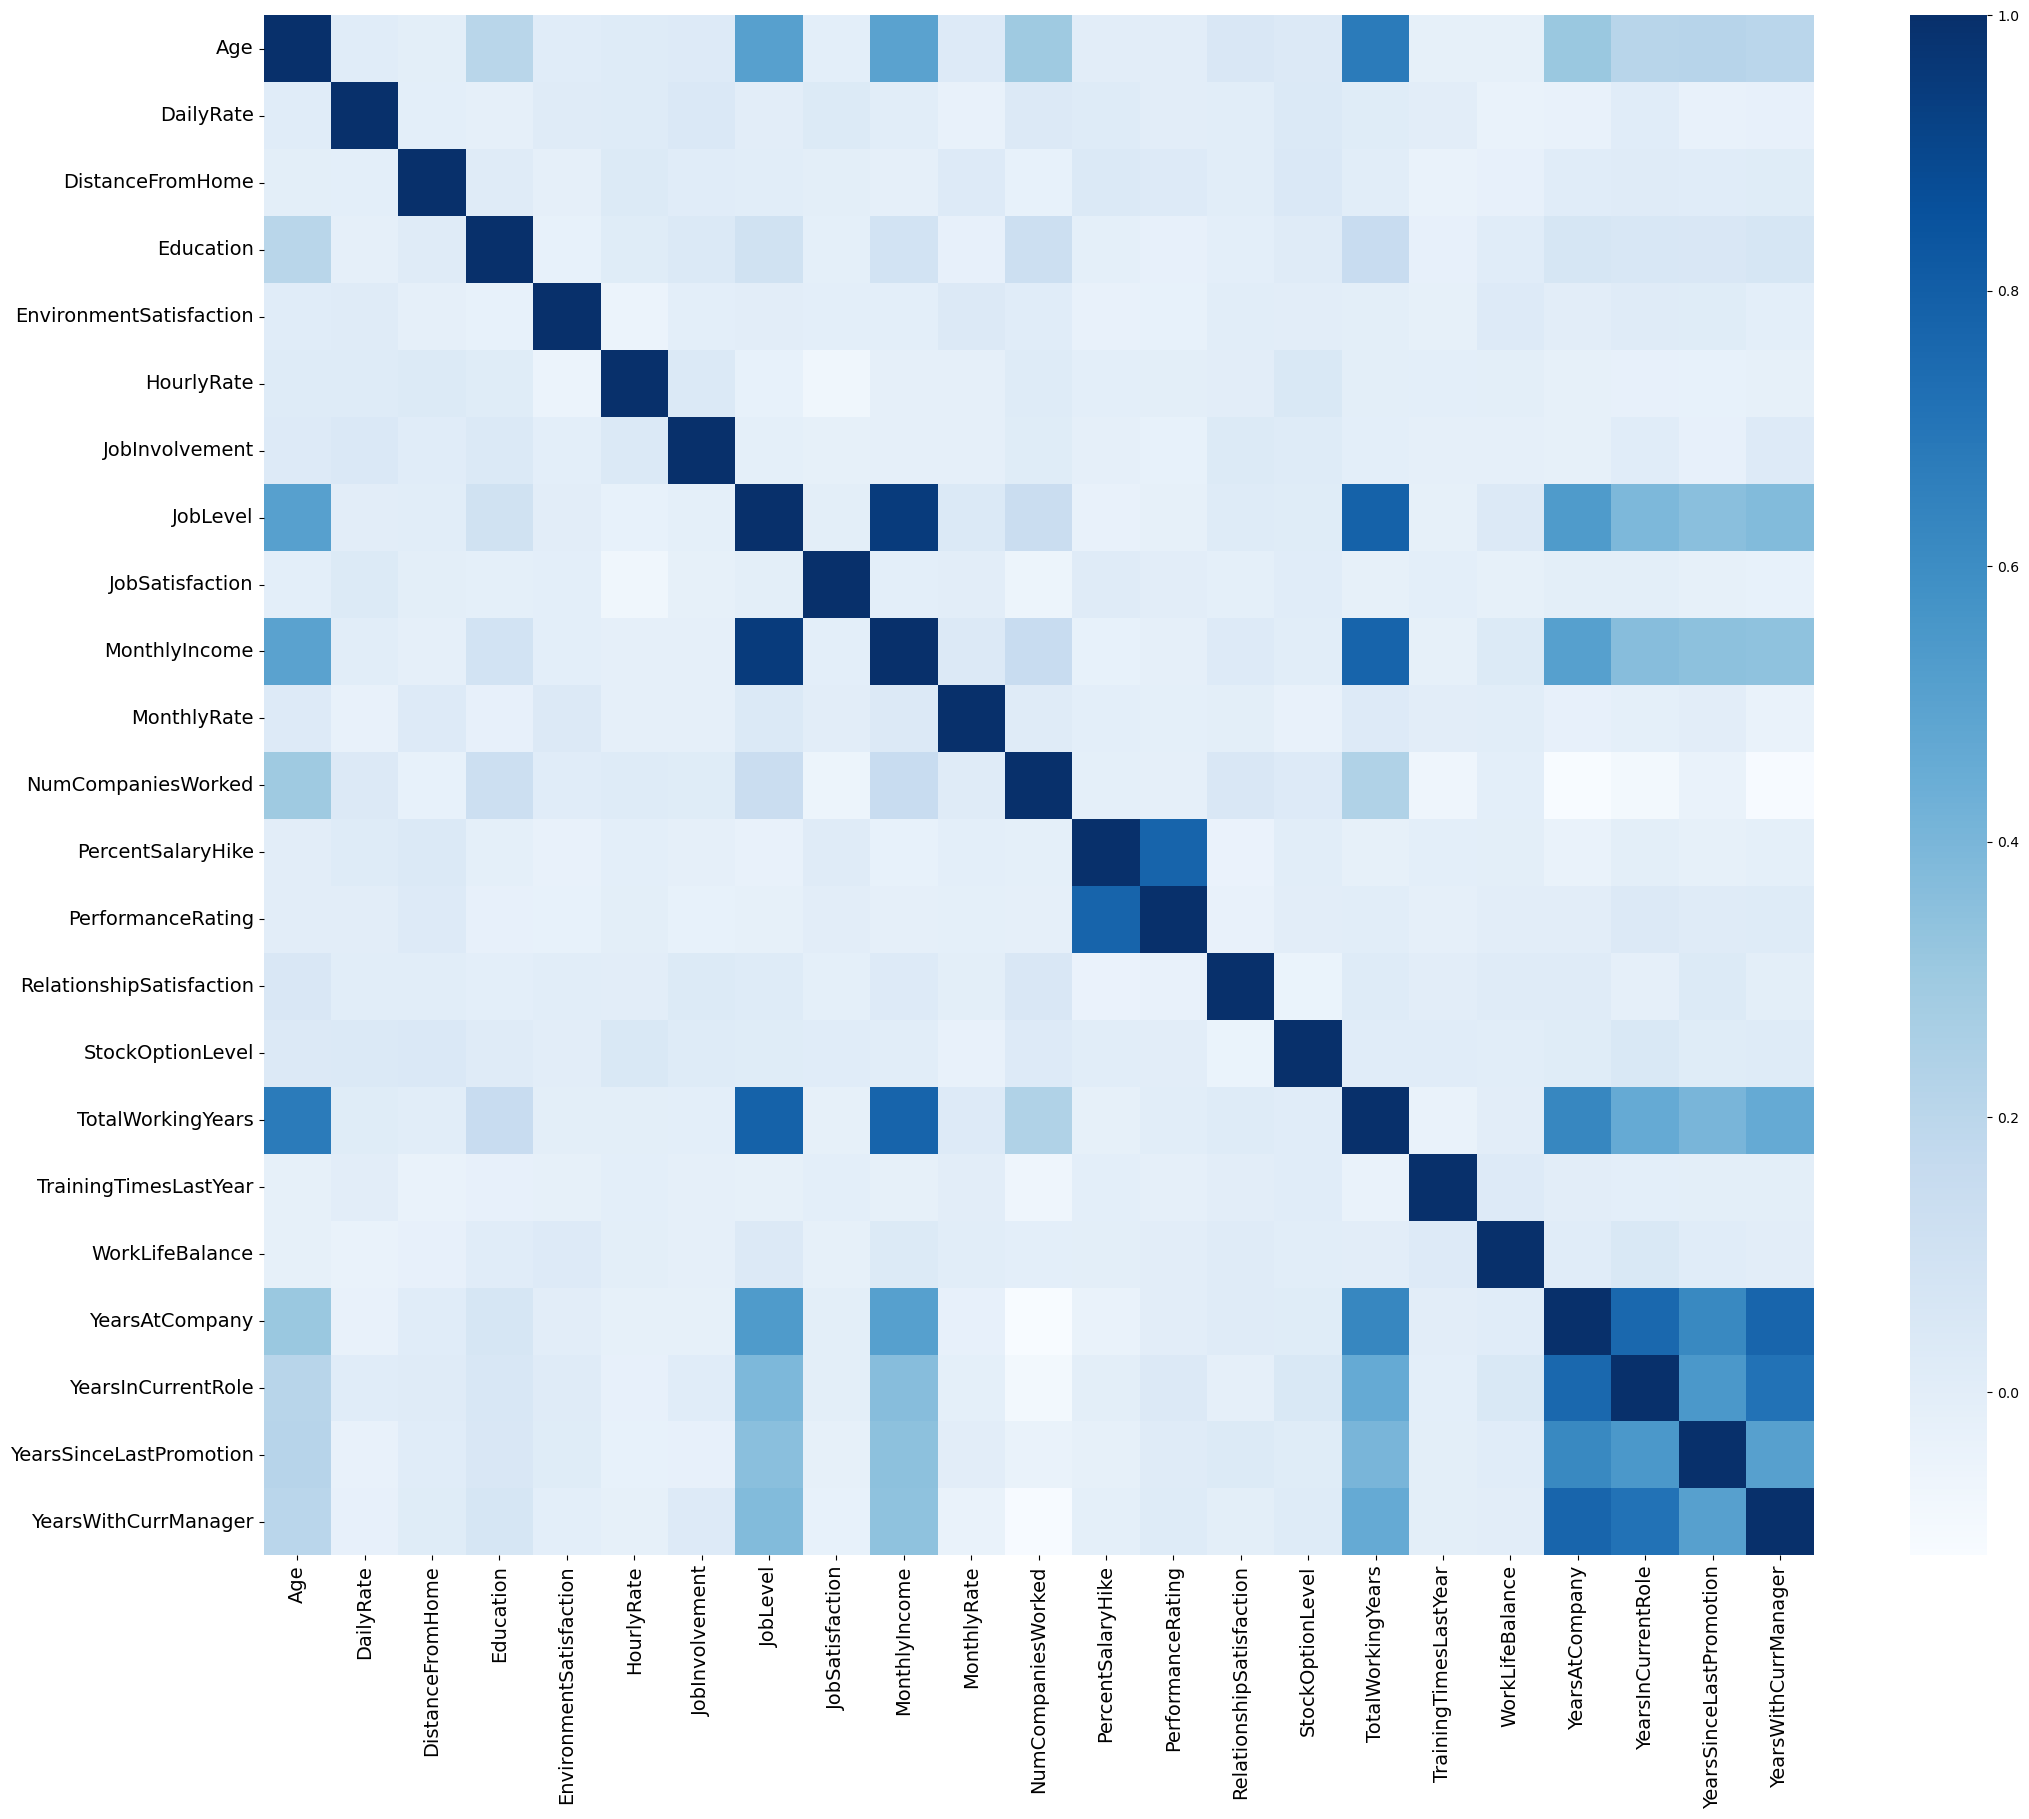

In [11]:
#Prior to preprocessing the dataset further, we can do a quick check regarding the correlation matrix which will further
#help us in feature standardization in preprocessing steps ahead


corr =df5.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, cmap="Blues", xticklabels=True, yticklabels=True, annot=False, annot_kws={"size": 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Analysis of correlation results - 

1. Job Level is highly correlated with Years at Company.
2. Monthly income is highly correlated with Years at Company.
3. Age is also positively correlated with Years at Company.
4. Total working years, years in current role, years since last promotion and years with current manager also are highly correlated with Years at company.

Hence, a straightforward implication that can be drawn from this insight is identifying the factors influencing an employee's length of tenure at the company. This valuable understanding will enable the organization to develop strategies focused on employee retention. Furthermore, we will validate whether these factors rank among the most significant features by utilizing the models presented below.

We will further move on the data exploration journey

In [12]:
# Get DataFrame Column Names of numerical types that we can use later
num_cols = list(df5.select_dtypes(include=['int64', 'float64' ]).columns)
print(df5.shape, '\n',num_cols,'\n', len(num_cols))

(1470, 32) 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 
 23


In [13]:
# checking the state of the data frame before we process categorical variable of binary type
df5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceCategory
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Positive
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,Moderate
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Positive
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,Positive
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,Moderate


In [14]:
#Prior to one hot encoding the variables, we will map the dependent variable and columns with only two categories to either a 'yes' or 'no'
df5['Attrition'] = df5['Attrition'].map({'Yes':1, 'No':0})
df5['Gender'] = df5['Gender'].map({'Male':1, 'Female':0})
df5['OverTime'] = df5['OverTime'].map({'Yes':1, 'No':0})
df5.head() # checking the processing

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceCategory
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,Positive
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,Moderate
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,Positive
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,Positive
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,Moderate


In [15]:
columns=df5.columns
columns=columns.drop("Attrition")
columns # seperating out the independent column names as we want to plot the graphs of dependent variable and independent features next.

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceCategory'],
      dtype='object')

We can further check the relation between attrition and other features in dataset to determine the attributes of employees who are most probably likely to leave the firm

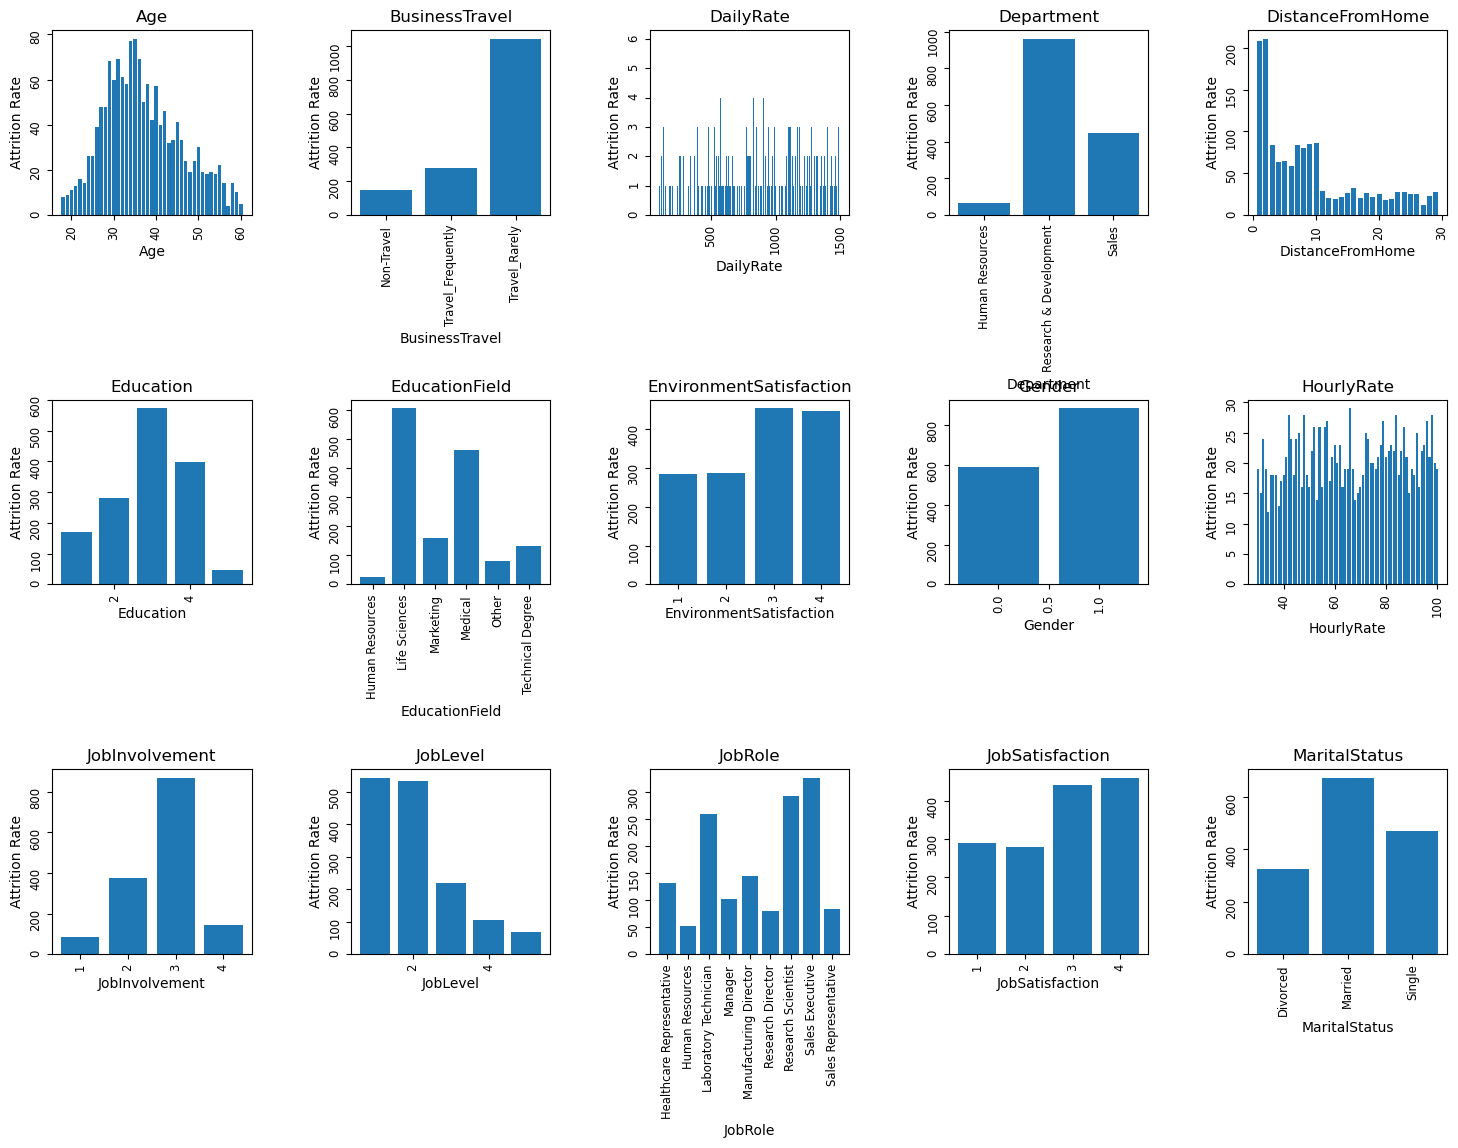

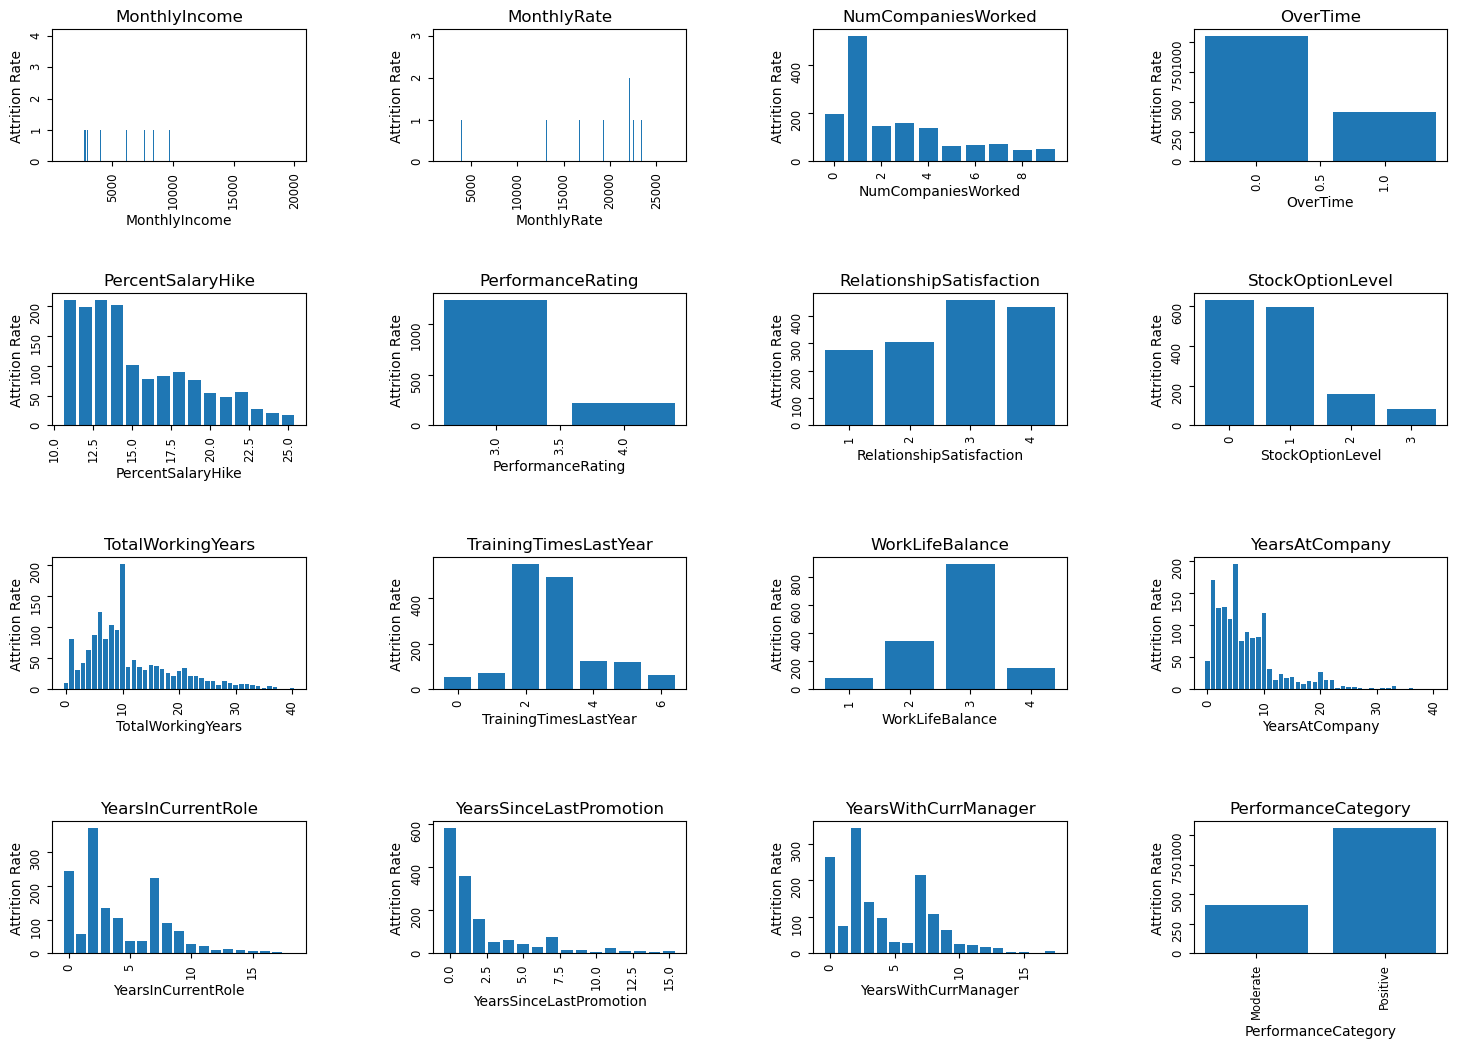

In [16]:

# where 'Attrition' represents the dependent variable and the other columns are the independent variables

# Create a figure and subplots for the first part (15 subplots)
fig, axs1 = plt.subplots(3, 5, figsize=(18, 12))
axs1 = axs1.flatten()

# Plotting the variation of 'Attrition' with each independent variable for the first part
for i, column in enumerate(columns[:15]):
    if column != 'Attrition':
        ax = axs1[i]
        attrition_counts = df5.groupby(column)['Attrition'].count()
        ax.bar(attrition_counts.index, attrition_counts.values)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Attrition Rate')
        ax.tick_params(axis='both', labelsize='small', rotation=90)

plt.subplots_adjust(hspace=1, wspace=0.5) #Adjust spacing

# Create a figure and subplots for the second part (16 subplots)
fig, axs2 = plt.subplots(4, 4, figsize=(18, 12))
axs2 = axs2.flatten()

# Plotting the variation of 'Attrition' with each independent variable for the second part
for i, column in enumerate(columns[15:]):
    if column != 'Attrition':
        ax = axs2[i]
        attrition_counts = df5.groupby(column)['Attrition'].count()
        ax.bar(attrition_counts.index, attrition_counts.values)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Attrition Rate')
        ax.tick_params(axis='both', labelsize='small', rotation=90)

# Adjust spacing between subplots for 2nd parts
plt.subplots_adjust(hspace=1, wspace=0.5)

# Display the charts
plt.show()



The relationship between variables gives us the following insights - 

1. Employees with a relatively lower monthly income (<10000) have a higher chance of leaving
2. Employees with a relatively lower work experience (TotalWorkingYears <10) have a higher chance of leaving the firm
3. Employees not engaging much in overtime activities are highly likely to leave the company in comparison to the ones who have a higher ovetime component
4. Employees within the age group of 30 to 40 years have the highest chance of leaving the organisation

These are some of the insights that could be gathered. We will further try to validate most important features determining attrition using our models below

### 3. Model Development and Analysis

Before moving on to building relevant models, we can do a quick check to whether the data is balanced or not. This will further help us in determining the split between training/validation/testing datasets in order to ensure that the classes are equally distributed between the three datasets

In [17]:
#Checking whether the data is balanced or not

print(df5.groupby('Attrition').size())

Attrition
0    1233
1     237
dtype: int64


The data is unbalanced. We will ensure that a equal split of classes is allocated to train/validation/testing datasets

In [18]:
#creating the dependent variable
y=df5["Attrition"] 

#independent features separated
X=df5.drop(columns=["Attrition"])

# get dummies ie. transform the categorical variables with more than two categories into dummy variable for the independent character features
X = pd.get_dummies(X) 
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PerformanceCategory_Moderate,PerformanceCategory_Positive
0,41,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


Splitting the dataset into train, validation and testing datasets in the ratio 70:15:15

In [19]:

#splitting the data

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=615, stratify=y)# 70:30 split #Using startify to ensure equal split of classes between train/validation/test datasets
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state=234, stratify=y_other)# 50:50 split



 We will further scale the train/validation/testing datasets using standard scaler, which standardizes the data by removing the mean and scaling to unit variance.  It centers the data around 0 and scales it using the standard deviation. It helps as many algorithms are sensitive to input feature scale. It also helps in convergence of optimization of cost function.

In [20]:
#defining the scaler
scaler = StandardScaler()

#computing parameters
scaler.fit(X_train[num_cols])

#scaling three sets
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_validation[num_cols] = scaler.transform(X_validation[num_cols])

 Now, checking the shapes of the train, validation and test datasets to see if they are uniform

In [21]:
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('X_validationidationidation shape is', X_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)
print('y_validationidationidation shape is', y_test.shape)


X_train shape is (1029, 51)
X_test shape is (220, 51)
X_validationidationidation shape is (220, 51)
y_train shape is (1029,)
y_test shape is (220,)
y_validationidationidation shape is (220,)


Before building out the models now, we will define a general function which can be used across all models. We use GridSearch function to determine the best hyperparameters across the models

#### NOTE - The outputs of all the models have been added onto a tabular format at the end, and the implications of the same will be discussed therein

In [22]:


def get_best_model(X_train, y_train, X_validation, y_validation, classifier, param_grid, cv=5):
    stratified_cv = StratifiedKFold(n_splits=cv) # as stratified k fold preserves distrribution in all splits of data
    grid = GridSearchCV(classifier, param_grid=param_grid, cv=stratified_cv, scoring='recall')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    print("Best parameters: ", grid.best_params_)

    # Evaluate the best model on the validation set
    val_pred = best_model.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, val_pred)
    val_recall = recall_score(y_validation, val_pred)
    val_roc = roc_auc_score(y_validation, best_model.predict_proba(X_validation)[:, 1])

    # print the results

    print("Validation Accuracy:", val_accuracy)
    print("Validation Recall:", val_recall)
    print("Validation ROC Score:", val_roc)

    #setting up a dictionary to collect the result parameters
    result_dict = {}
    result_dict['validation_accuracy'] = val_accuracy
    result_dict['validation_recall'] = val_recall
    result_dict['validation_roc'] = val_roc

    return best_model, result_dict



#### 3.1 Logistic Regression

Using the general function for the logistic regression model to determine the best parameters. The logistics regression is a clear chocie to go first as the dependent variable "Attrition" is of binary nature. It is also a simple and interpretable model with linear decision boundary, so it can be a good baseline model.

In [23]:
# Usage:
classifier_name = 'Logistic_Regression'
logistic_best_model, result = get_best_model(X_train, y_train, X_validation, y_validation, LogisticRegression(solver='liblinear'),
                                    param_grid={'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']},
                                    cv=5)

# Append the result to a dictionary that stores the classifier results
classifier_results = {}
classifier_results[classifier_name] = result


Best parameters:  {'C': 1.0, 'penalty': 'l1'}
Validation Accuracy: 0.8506787330316742
Validation Recall: 0.3055555555555556
Validation ROC Score: 0.8282282282282282


We will further define a function to evaluate the model on the testing dataset and storing the results for use in a tabular format later on 

In [24]:
def test_model(best_model, X_test, y_test):
    test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

    result_dict = {}
    result_dict['test_accuracy'] = test_accuracy
    result_dict['test_recall'] = test_recall
    result_dict['test_roc'] = test_roc

    return result_dict

In [25]:
test_result = test_model(logistic_best_model, X_test, y_test)

# Append the test result to the classifier results dictionary under the same key
classifier_results[classifier_name].update(test_result)

From this point onwards, we focused on models capable of handling non-linear relationships. 

#### 3.2 Random Forest

We used Random forest over decision tree because of its ensemble nature 
and also tree based models gives feature importance which can be helpful
when dataset have high number of independent features to be dealt with.

In [26]:


# Usage example:
classifier_name = 'Random_Forest'
classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}# defining the required parameter conditions for GridSearch

random_forest_best_model, result = get_best_model(X_train, y_train, X_validation, y_validation, classifier, param_grid, cv=5) #using the function
classifier_results[classifier_name] = result

# Test the Random Forest model on the test data and append the results
random_forest_test_result = test_model(random_forest_best_model, X_test, y_test)
classifier_results[classifier_name].update(random_forest_test_result)


Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Validation Accuracy: 0.8506787330316742
Validation Recall: 0.1111111111111111
Validation ROC Score: 0.8323573573573574


In [27]:
classifier_results# check the resultant dictionary status

{'Logistic_Regression': {'validation_accuracy': 0.8506787330316742,
  'validation_recall': 0.3055555555555556,
  'validation_roc': 0.8282282282282282,
  'test_accuracy': 0.8681818181818182,
  'test_recall': 0.3142857142857143,
  'test_roc': 0.8270270270270269},
 'Random_Forest': {'validation_accuracy': 0.8506787330316742,
  'validation_recall': 0.1111111111111111,
  'validation_roc': 0.8323573573573574,
  'test_accuracy': 0.8590909090909091,
  'test_recall': 0.2,
  'test_roc': 0.8084942084942085}}

Now, we will also obtain the feature importance plot from the random forest model which will indicate the most important features determining the attrition in a prospective organisation

In [28]:
def plot_feature_importance(importance, names, model_type):

    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a Dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in descending order of feature importance
    fi_df.sort_values(by='feature_importance', ascending=False, inplace=True)

    # Select the top five features
    top_features = fi_df.iloc[:5]

    # Define size of bar plot
    plt.figure(figsize=(10, 8))
    # Plot Seaborn bar chart for the top five features
    sns.barplot(x=top_features['feature_importance'], y=top_features['feature_names'])
    # Add chart labels
    plt.title(' FEATURE IMPORTANCE FROM'+" "+ model_type +" "+'(TOP 5)')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()


In [29]:
# Create a DataFrame from feature importances and column names (to see the tabular format representation)
feature_importance_df = pd.DataFrame(
    {
        'Feature': X_train.columns,
        'Importance': random_forest_best_model.feature_importances_
    }
)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
feature_importance_df.head()

,Feature,Importance
10,MonthlyIncome,0.074057
0,Age,0.057854
18,TotalWorkingYears,0.052806
13,OverTime,0.052629
2,DistanceFromHome,0.051621


Using the function for random forest

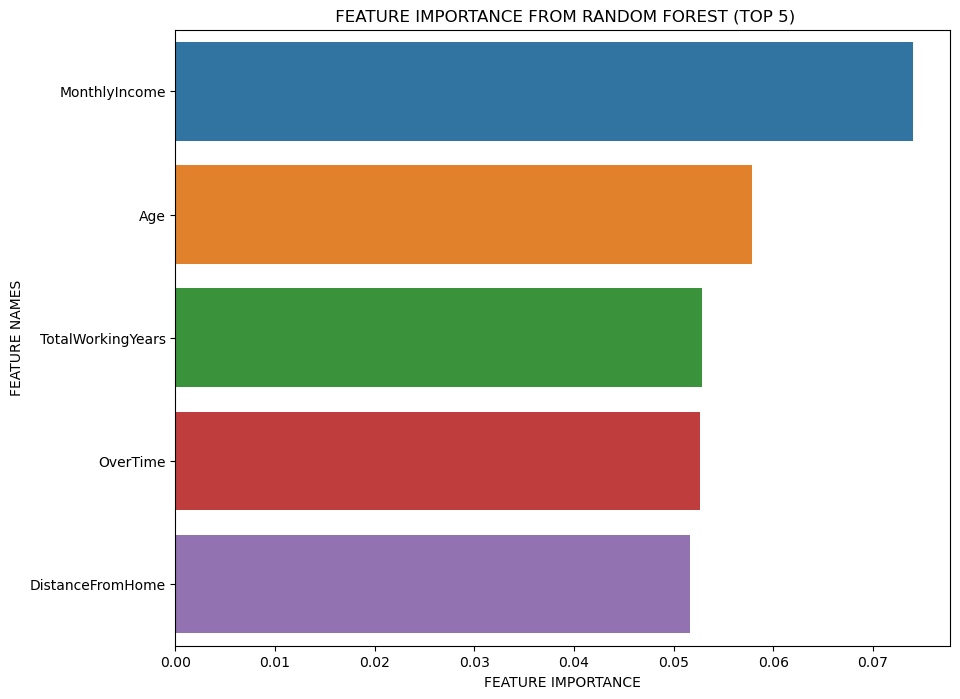

In [30]:
plot_feature_importance(random_forest_best_model.feature_importances_,X_train.columns,'RANDOM FOREST')

#### 3.3 Support Vector Classifier

Along with capability to handle non-linear seperation by 
mapping the data into a higher-dimensional feature space 
using kernel functions, SVC performs well even in high-dimensional 
feature spaces, making it suitable for datasets with a large number 
of independent variables. SVC's aim to maximize the margin between the decision boundary and the data points also helps in better generalization and improved performance on unseen data (test data in our case).

Prior to building out the SVC model, we need to decide the appropriate kernel based on the distribution of classes, as shown in the scatter plot below

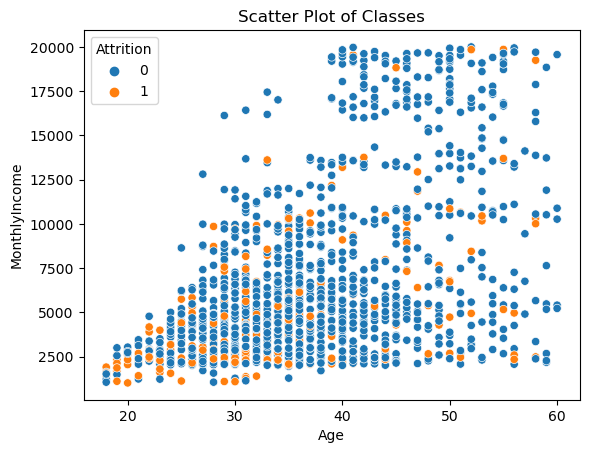

In [31]:
#visualised on a scatter plot



sns.scatterplot(data=df5, x='Age', y='MonthlyIncome', hue='Attrition')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.title('Scatter Plot of Classes')
plt.show()

We will use the Radial Basis Function (RBF) kernel to build the SVC model since it is clearly evident that the classes follow a non-linear distribution, as observed on the scatter plot above.

In [32]:
# Define the SVC classifier and its parameter grid
classifier_name = 'SVC'
svc_classifier = SVC(kernel='rbf', random_state=0, probability=True)

param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Get the best SVC model
svc_best_model, result = get_best_model(X_train, y_train, X_validation, y_validation, svc_classifier, param_grid_svc, cv=5)


# Evaluate the best model on the test data
test_result = test_model(svc_best_model, X_test, y_test)

# Print the test accuracy, recall, and ROC score
print("Test Accuracy:", test_result['test_accuracy'])
print("Test Recall:", test_result['test_recall'])
print("Test ROC Score:", test_result['test_roc'])

# Append the test result to the classifier results dictionary under the same key
classifier_results[classifier_name] = result
classifier_results[classifier_name].update(test_result)


Best parameters:  {'C': 100, 'gamma': 0.01}
Validation Accuracy: 0.8190045248868778
Validation Recall: 0.4166666666666667
Validation ROC Score: 0.7647147147147147
Test Accuracy: 0.8681818181818182
Test Recall: 0.42857142857142855
Test ROC Score: 0.8421621621621621


In [33]:
classifier_results

{'Logistic_Regression': {'validation_accuracy': 0.8506787330316742,
  'validation_recall': 0.3055555555555556,
  'validation_roc': 0.8282282282282282,
  'test_accuracy': 0.8681818181818182,
  'test_recall': 0.3142857142857143,
  'test_roc': 0.8270270270270269},
 'Random_Forest': {'validation_accuracy': 0.8506787330316742,
  'validation_recall': 0.1111111111111111,
  'validation_roc': 0.8323573573573574,
  'test_accuracy': 0.8590909090909091,
  'test_recall': 0.2,
  'test_roc': 0.8084942084942085},
 'SVC': {'validation_accuracy': 0.8190045248868778,
  'validation_recall': 0.4166666666666667,
  'validation_roc': 0.7647147147147147,
  'test_accuracy': 0.8681818181818182,
  'test_recall': 0.42857142857142855,
  'test_roc': 0.8421621621621621}}

#### 3.4 XGBoost

Choice of XGBoost over gradient boosting i again because of its ensemble nature along with the fact that it capable to handle imbalanced data better than others. 

In [34]:
#if one doesn't have XGBoost
#!pip install xgboost

In [35]:
from xgboost import XGBClassifier

# Define the XGBoost classifier and its parameter grid
classifier_name = 'XGBoost'

xgboost_classifier = XGBClassifier(random_state=0)

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Get the best XGBoost model
xgboost_best_model, result = get_best_model(X_train, y_train, X_validation, y_validation, xgboost_classifier, param_grid, cv=5)

# Evaluate the best model on the test data
test_result = test_model(xgboost_best_model, X_test, y_test)

# Append the test result to the classifier results dictionary under the same key
classifier_results[classifier_name] = result
classifier_results[classifier_name].update(test_result)


Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Validation Accuracy: 0.8461538461538461
Validation Recall: 0.2222222222222222
Validation ROC Score: 0.816966966966967


#### 3.5 Deep Learning Model (Dense Fully Connected Neural Network)

As discuused later, even though deep learning models are costly to implement, as long as organisation can handle that, neural network models tend to handle complex data much better and scakes well with higher size of the data. These models also benefits from transfer learning capability, automatic feature extraction etc. We have tried a sequential model with simple dense layers and one softmax layer at the end to show the use of deep learning models.  

In [36]:
#Import the relevant libraries for building the neural network model

import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import keras_tuner as kt

In [37]:
#clear out TensorFlow's cache
tf.keras.backend.clear_session()

In [38]:
#Changing the shape of the train label data

print("Shape before one-hot encoding: ", y_train.shape)
# Convert target labels to one-hot encoded vectors

y_train_dl = keras.utils.to_categorical(y_train)
y_test_dl = keras.utils.to_categorical(y_test)
y_validation_dl = keras.utils.to_categorical(y_validation)
print("Shape after one-hot encoding: ", y_train_dl.shape)

Shape before one-hot encoding:  (1029,)
Shape after one-hot encoding:  (1029, 2)


In [39]:
print(X_train.shape, y_train_dl.shape)
print(X_validation.shape, y_validation_dl.shape)
print(X_test.shape, y_test_dl.shape)
# checking the shape of the data

(1029, 51) (1029, 2)
(221, 51) (221, 2)
(220, 51) (220, 2)


Defining the architecture of the neural network model

In [40]:
from keras.callbacks import ModelCheckpoint

# Define the checkpoint filepath
checkpoint_filepath = 'model_checkpoint.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Create the model
model_onlydense = Sequential()
# Input layer
model_onlydense.add(Dense(200, input_dim=51, activation='relu'))
# Hidden layer
model_onlydense.add(Dense(50, activation='relu'))
# Output layer
model_onlydense.add(Dense(2, activation='softmax'))

# Compile the model
model_onlydense.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with the callback
history = model_onlydense.fit(X_train, y_train_dl, validation_data=(X_validation, y_validation_dl), epochs=30, callbacks=[checkpoint])


Epoch 1/30
32/33 [============================>.] - ETA: 0s - loss: 0.4652 - accuracy: 0.8311 
Epoch 1: val_accuracy improved from -inf to 0.83710, saving model to model_checkpoint.h5
33/33 [==============================] - 1s 7ms/step - loss: 0.4646 - accuracy: 0.8309 - val_loss: 0.4259 - val_accuracy: 0.8371
Epoch 2/30
 1/33 [..............................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8750
Epoch 2: val_accuracy did not improve from 0.83710
33/33 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8465 - val_loss: 0.3919 - val_accuracy: 0.8371
Epoch 3/30
 1/33 [..............................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8750
Epoch 3: val_accuracy improved from 0.83710 to 0.85973, saving model to model_checkpoint.h5
33/33 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8649 - val_loss: 0.3667 - val_accuracy: 0.8597
Epoch 4/30
 1/33 [..............................] - ETA: 0s - loss: 0.2605 - accuracy: 0.9375

/home/jit/anaconda3/envs/businessanalytics/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/33 [==========================>...] - ETA: 0s - loss: 0.2985 - accuracy: 0.8958
Epoch 4: val_accuracy did not improve from 0.85973
33/33 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8970 - val_loss: 0.3560 - val_accuracy: 0.8597
Epoch 5/30
 1/33 [..............................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8438
Epoch 5: val_accuracy did not improve from 0.85973
33/33 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.9057 - val_loss: 0.3501 - val_accuracy: 0.8552
Epoch 6/30
 1/33 [..............................] - ETA: 0s - loss: 0.3520 - accuracy: 0.9062
Epoch 6: val_accuracy did not improve from 0.85973
33/33 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9155 - val_loss: 0.3664 - val_accuracy: 0.8552
Epoch 7/30
 1/33 [..............................] - ETA: 0s - loss: 0.2263 - accuracy: 0.8750
Epoch 7: val_accuracy did not improve from 0.85973
33/33 [==============================] - 0s 

In [41]:
results = {}

# Load the saved model
saved_model = keras.models.load_model('model_checkpoint.h5')

# Make predictions on the validation data
val_predictions = saved_model.predict(X_validation)

# Convert predictions to class labels for validation data
val_class_predictions = np.argmax(val_predictions, axis=1)

# Calculate validation accuracy
val_accuracy = np.mean(val_class_predictions == y_validation)
results['validation_accuracy'] = val_accuracy

# Calculate validation ROC
val_roc = roc_auc_score(y_validation, val_predictions[:, 1])
results['validation_roc'] = val_roc

# Calculate validation recall
val_recall = recall_score(y_validation, val_class_predictions)
results['validation_recall'] = val_recall

# Make predictions on the test data
test_predictions = saved_model.predict(X_test)

# Convert predictions to class labels for test data
test_class_predictions = np.argmax(test_predictions, axis=1)

# Calculate test accuracy
test_accuracy = np.mean(test_class_predictions == y_test)
results['test_accuracy'] = test_accuracy

# Calculate test ROC
test_roc = roc_auc_score(y_test, test_predictions[:, 1])
results['test_roc'] = test_roc

# Calculate test recall
test_recall = recall_score(y_test, test_class_predictions)
results['test_recall'] = test_recall


7/7 [==============================] - 0s 1ms/step


In [42]:
results

{'validation_accuracy': 0.8597285067873304,
 'validation_roc': 0.7897897897897899,
 'validation_recall': 0.2222222222222222,
 'test_accuracy': 0.8863636363636364,
 'test_roc': 0.7925868725868725,
 'test_recall': 0.3142857142857143}

In [43]:
classifier_results['Only_denselayer'] = results

In [44]:
classifier_results

{'Logistic_Regression': {'validation_accuracy': 0.8506787330316742,
  'validation_recall': 0.3055555555555556,
  'validation_roc': 0.8282282282282282,
  'test_accuracy': 0.8681818181818182,
  'test_recall': 0.3142857142857143,
  'test_roc': 0.8270270270270269},
 'Random_Forest': {'validation_accuracy': 0.8506787330316742,
  'validation_recall': 0.1111111111111111,
  'validation_roc': 0.8323573573573574,
  'test_accuracy': 0.8590909090909091,
  'test_recall': 0.2,
  'test_roc': 0.8084942084942085},
 'SVC': {'validation_accuracy': 0.8190045248868778,
  'validation_recall': 0.4166666666666667,
  'validation_roc': 0.7647147147147147,
  'test_accuracy': 0.8681818181818182,
  'test_recall': 0.42857142857142855,
  'test_roc': 0.8421621621621621},
 'XGBoost': {'validation_accuracy': 0.8461538461538461,
  'validation_recall': 0.2222222222222222,
  'validation_roc': 0.816966966966967,
  'test_accuracy': 0.8727272727272727,
  'test_recall': 0.37142857142857144,
  'test_roc': 0.8208494208494208},


We can now pull the outputs of all the models into a tabular format and thereafter explore the business implications associated with it

In [45]:
df_results=(pd.DataFrame(classifier_results)).transpose()

In [46]:
df_results

,validation_accuracy,validation_recall,validation_roc,test_accuracy,test_recall,test_roc
Logistic_Regression,0.850679,0.305556,0.828228,0.868182,0.314286,0.827027
Random_Forest,0.850679,0.111111,0.832357,0.859091,0.200000,0.808494
SVC,0.819005,0.416667,0.764715,0.868182,0.428571,0.842162
XGBoost,0.846154,0.222222,0.816967,0.872727,0.371429,0.820849
Only_denselayer,0.859729,0.222222,0.789790,0.886364,0.314286,0.792587


In order to determine the best model fit for our analysis, we will undertake the following approach - 

1. We will take a combination of both Accuracy and Recall to determine the best model for our analysis

2. Accuracy will help us chose a model wherein the highest accuracy will ensure that we get highly accurate predictions on our dataset

3. Recall i.e. TP/(TP+FN) or True Positive Rate will help us chose a model wherein a higher recall score will ensure that the number of true positives are the highest and at the same time minimising the number of false negatives. The figure under false negatives is of interest to us due to the fact that in our dataset it indicates the employees who were meant to stay in the organisation as per the model but decide to leave. In such a cases, the associated costs are relatively higher (which is a combination of replacement and training costs, along with a waste of incentives and loss of experienced talent) and minimising that will help us reduce the total costs incurred on attrition of employees

Undertaking the approach given above, we can come to the conclusion that - 

1. SVC is the best model in terms of recall score (though the accuracy isn't far away from the neural network model's)

2. A dense layer fully connected neural network is the best model in terms of accuracy (though the recall score isn't far away from the SVC model's)

3. Both of these two performs better than the baseline logistics model in terms of recall score and in terms of accuracy also its similar or better.

The adoption of either is dependant upon the needs of the organisation and long term benefits that could be gained from model implementation. Key considerations could be -

1. Complexity and costs associated with a neural network model may deter smaller organisations to avoid them

2. The scalability of the neural network may have an advantage over the limitations of SVC wherein complex neural network models can handle large amounts of data (especially in organisations with a global employee based situated worldwide. Any restructuring strategy wherein headcount reduction may be necessary can be solved precisely using neural network models)

Further, we may also analyse the models selected based on cost savings which is basically minimising the false negatives (carrying the highest costs in our case). We can do so using the confusion matrix for both the models as shown below - 

In [47]:
# Calculate the confusion matrix for the SVC test data
confusion = confusion_matrix(y_test, svc_best_model.predict(X_test))

# Extract TP, FP, TN, and FN from the confusion matrix
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Print TP, FP, TN, FN
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

True Positives (TP): 15
False Positives (FP): 9
True Negatives (TN): 176
False Negatives (FN): 20


In [48]:
# Calculate the confusion matrix for the neural network test data
confusion = confusion_matrix(y_test, test_class_predictions)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[184   1]
 [ 24  11]]


The false negatives in case of neural network model is 21 as compared to SVC which is 20. Both the models deliver the same amount of cost savings in terms of minimising false negatives, though the final cost savings would ultimately be determined considering the long term benefits received by the organisation from implementing the right appropriate model.